In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings


warnings.filterwarnings('ignore')

rng = np.random.default_rng(seed=42)

# Hidden data (you would not see this in the real challenge)
y_test = rng.uniform(15, 150, 10000)
y_pred = rng.uniform(15, 150, 10000)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

55.18791669000562

<Axes: ylabel='Count'>

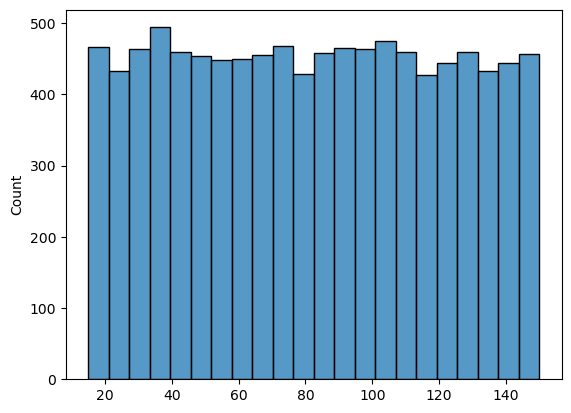

In [4]:
sns.histplot(y_test)

In [5]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# ---- Guess 1: constant value of 15 ----
guess1 = np.full(10000, 15.0)
rmse1 = rmse(y_test, guess1)
print("Guess 1 (all 15): RMSE =", rmse1)

# ---- Guess 2: constant value of 150 ----
guess2 = np.full(10000, 150.0)
rmse2 = rmse(y_test, guess2)
print("Guess 2 (all 150): RMSE =", rmse2)

# ---- Use the two RMSE values to estimate the mean ----
# We have: RMSE_1^2 = sigma^2 + (m - 15)^2, and RMSE_2^2 = sigma^2 + (m - 150)^2.
# Subtracting yields:
# RMSE_2^2 - RMSE_1^2 = (m - 150)^2 - (m - 15)^2 = -270*m + 22275
m_est = (22275 - (rmse2**2 - rmse1**2)) / 270
print("Estimated mean m:", m_est)

# ---- (Optional) Estimate sigma^2 ----
sigma2_est = rmse1**2 - (m_est - 15)**2
print("Estimated variance sigma^2:", sigma2_est)
print("Estimated minimal RMSE (i.e. sqrt(sigma^2)):", np.sqrt(sigma2_est))

# ---- Guess 3: use the estimated mean for all predictions ----
guess3 = np.full(10000, m_est)
rmse3 = rmse(y_test, guess3)
print("Guess 3 (all m_est): RMSE =", rmse3)

# For guesses 4 and 5, you could simply resubmit guess3.
guess4 = guess3.copy()
rmse4 = rmse(y_test, guess4)
print("Guess 4 (all m_est): RMSE =", rmse4)

guess5 = guess3.copy()
rmse5 = rmse(y_test, guess5)
print("Guess 5 (all m_est): RMSE =", rmse5)

Guess 1 (all 15): RMSE = 77.57425565362847
Guess 2 (all 150): RMSE = 78.24757445961043
Estimated mean m: 82.11141567186012
Estimated variance sigma^2: 1513.8230267333165
Estimated minimal RMSE (i.e. sqrt(sigma^2)): 38.907878723123886
Guess 3 (all m_est): RMSE = 38.90787872312391
Guess 4 (all m_est): RMSE = 38.90787872312391
Guess 5 (all m_est): RMSE = 38.90787872312391


In [21]:
guess4 = np.array([m_est] * 9999 + [100])
rmse(y_test, guess4)

38.9083905863771

In [23]:
guess5 = np.array([m_est] * 9999 + [70])
rmse5 = rmse(y_test, guess5)
rmse5

38.907999091682726

In [24]:
import pandas as pd 

test_df = pd.read_csv(r'..//data//test.csv')
train_df = pd.read_csv(r'..//data//train.csv')

In [27]:
import numpy as np
from scipy.stats import ks_2samp, chi2_contingency

# Get common features
common_features = list(set(train_df.columns) & set(test_df.columns))

# Separate numerical and categorical features
numerical_features = [col for col in common_features if train_df[col].dtype != 'O']
categorical_features = [col for col in common_features if train_df[col].dtype == 'O']

# Run hypothesis tests
results = {}

# Kolmogorov-Smirnov Test for numerical features
for col in numerical_features:
    stat, p_value = ks_2samp(train_df[col].dropna(), test_df[col].dropna())
    results[col] = {"test": "Kolmogorov-Smirnov", "statistic": stat, "p_value": p_value}

# Chi-Square Test for categorical features
for col in categorical_features:
    train_counts = train_df[col].value_counts()
    test_counts = test_df[col].value_counts()
    common_categories = list(set(train_counts.index) & set(test_counts.index))

    if common_categories:
        train_freqs = train_counts.loc[common_categories].values
        test_freqs = test_counts.loc[common_categories].values

        # Ensure both arrays have the same shape
        contingency_table = np.array([train_freqs, test_freqs])
        stat, p_value, _, _ = chi2_contingency(contingency_table)
        results[col] = {"test": "Chi-Square", "statistic": stat, "p_value": p_value}

results_df = pd.DataFrame.from_dict(results, orient="index")
results_df

,test,statistic,p_value
id,Kolmogorov-Smirnov,1.000000,0.000000
Weight Capacity (kg),Kolmogorov-Smirnov,0.002784,0.309828
Compartments,Kolmogorov-Smirnov,0.001257,0.991316
Brand,Chi-Square,0.438971,0.979164
Style,Chi-Square,1.926670,0.381618
Size,Chi-Square,0.921878,0.630691
Laptop Compartment,Chi-Square,0.680668,0.409357
Waterproof,Chi-Square,0.055313,0.814063
Color,Chi-Square,3.481533,0.626184
Material,Chi-Square,5.132527,0.162346
